In [1]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import pickle

import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras

import numpy as np
import os
import time
import json
import pandas as pd
import random

from pickle import dump
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Embedding

In [3]:
path = "drive/MyDrive/nlp-project/"
model_path = path + 'models/10k_new/'
data_path = path + 'data/reddit_jokes.json'

In [4]:
from tensorflow import keras
model = keras.models.load_model(model_path + 'model-word.h5')

In [5]:
tokenizer = pickle.load(open(model_path + 'tokenizer-word.pkl', "rb"))

In [6]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	while True:
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = tf.keras.preprocessing.sequence.pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		choices = model.predict(encoded)
		yhat = np.random.choice(len(choices[0]), p=choices[0])

		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		if out_word == 'xyz':
			result.append('.')
			break
		result.append(out_word)
	return ' '.join(result)

In [7]:
generate_seq(model, tokenizer, 20, "hello")

'.'

In [8]:
def clean_df(df):
    # Remove content after edit
    df["title"] = df["title"].str.replace(r'edit:.*', '')
    df["body"] = df["body"].str.replace(r'edit:.*', '')
    
    # Creating "joke" column
    df["joke"] = np.where(df["title"].str[:10] != df["body"].str[:10], df["title"] + " " + df["body"], df["body"])
    
    return df

In [9]:
def read(json_filename):
    df = pd.read_json(path_or_buf=json_filename,orient='records',compression="infer")
    print("All jokes len", len(df))
    df = clean_df(df.iloc[:number_of_jokes])
    print("Loaded", number_of_jokes)
    
    return df

In [10]:
number_of_jokes = 10000
jokes_df = read(data_path)

All jokes len 194553
Loaded 10000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

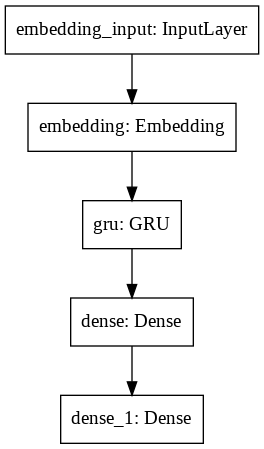

In [11]:
keras.utils.plot_model(model)

In [40]:
jokes_list = jokes_df['joke'].to_numpy()
n = 3
for joke in jokes_list[4500:4600]:
  joke_split = joke.split(" ")
  if len(joke_split) > 50:
    continue
  pepe = " ".join(joke_split[:-n])
  generated = generate_seq(model, tokenizer, 20, pepe)
  if generated.strip() == '.' or len(generated.split(" ")) > 50:
    continue
  print("**Original joke:**")
  print(joke)
  print("**Generated:**")
  print(pepe, "::", generated)
  print("\n")

**Original joke:**
[OC] What do you tell a preacher when they invite you over for spaghetti dinner? "Pasta pasta, pasta." :)

EDIT: Say it out loud.
**Generated:**
[OC] What do you tell a preacher when they invite you over for spaghetti dinner? "Pasta pasta, pasta." :)

EDIT: Say :: it out loud .


**Original joke:**
A little girl gets lost in the supermarket A security guard asks her 'What's your mum like?'

'Big cocks and vodka', replied the little girl
**Generated:**
A little girl gets lost in the supermarket A security guard asks her 'What's your mum like?'

'Big cocks and vodka', replied :: the little girl that's 3 i replied my what boy i was willing to like a shit pressed .


**Original joke:**
Some people worry drinking in the shower is a sign of alcoholism I just worry about keeping the water out of my beer 
**Generated:**
Some people worry drinking in the shower is a sign of alcoholism I just worry about keeping the water out of :: my beer in my way i have my wife and gave bir